# Ford Gobike Data Analysis
## by David Forino

## Investigation Overview

> In this report I have investigated the Ford Gobike dataset provided by Udacity. The purpose of this analysis is to find some insights and possible correlations between customer data and bike sharing service in terms of frequency and sharing time duration.

## Dataset Overview

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains over 183000 data points with 16 features for each one of them, including duration time, customer age, start and end time, gender and more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

# Remove trips with a duration >= 6000 seconds
df_6000 = df.query('duration_sec < 6000')
df_6000.reset_index(inplace=True, drop=True)

# Change data type and derive weekday
df_6000["start_time"] = pd.to_datetime(df_6000['start_time'], format='%Y-%m-%d %H:%M:%S')
df_6000["end_time"] = pd.to_datetime(df_6000['end_time'], format='%Y-%m-%d %H:%M:%S')
df_6000["weekday"] = pd.Categorical(df_6000["start_time"].dt.day_name(), 
                                    categories=[
                                        "Monday", "Tuesday", "Wednesday", 
                                        "Thursday", "Friday", "Saturday", "Sunday"
                                    ], ordered=True)

# Derive hour from time
df_6000["hour"] = df_6000["start_time"].dt.strftime('%H')

# Calculate user age
df_6000['age'] = 2019 - df_6000['member_birth_year']

# Delete values above 80 years old
df_6000.loc[df_6000["age"] > 80, ['age']] = np.nan

## Bike sharing time statistics

> 95% of trips' duration is below 1509 seconds, which is ~25 minutes and the most frequent rides have a duration of 9 minutes.

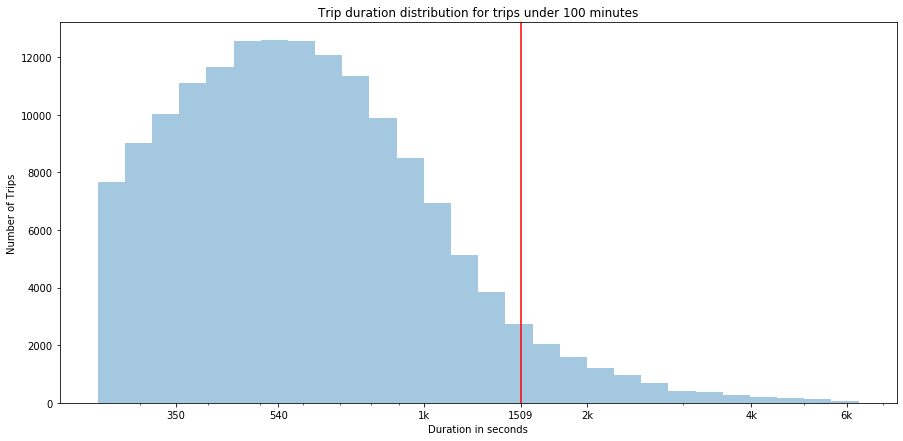

In [3]:
binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df_6000['duration_sec'].max()) + binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['duration_sec'], bins, kde=False)
plt.title('Trip duration distribution for trips under 100 minutes')
plt.xlabel('Duration in seconds')
plt.ylabel('Number of Trips')
plt.xscale('log')

quantile_95 = df_6000.duration_sec.quantile(.95)
plt.axvline(x=quantile_95, color='red')

plt.xticks([350, 540, 1e3, quantile_95, 2e3, 4e3, 6e3], [350, 540, '1k', 1509, '2k', '4k', '6k']);

## Less customers during the weekend

> During the weekend the number of trips is less then half compared to the rest of the week and Thursday is the day of the week with the highest number of trips. This is valid only for subscribed customers.

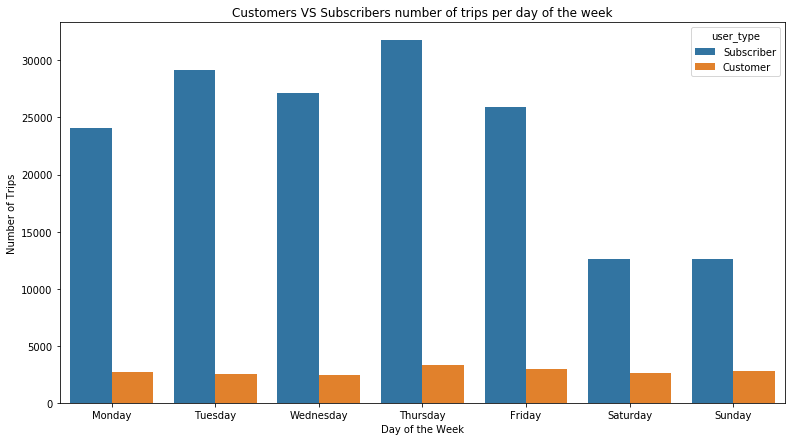

In [4]:
plt.figure(figsize=[13, 7])
sb.countplot(data=df_6000, x="weekday", hue="user_type")
plt.title("Customers VS Subscribers number of trips per day of the week")
plt.ylabel('Number of Trips')
plt.xlabel('Day of the Week');

## High demand before and after work

> Number of trips increase significantly during the time in which usually people go or come back from work.

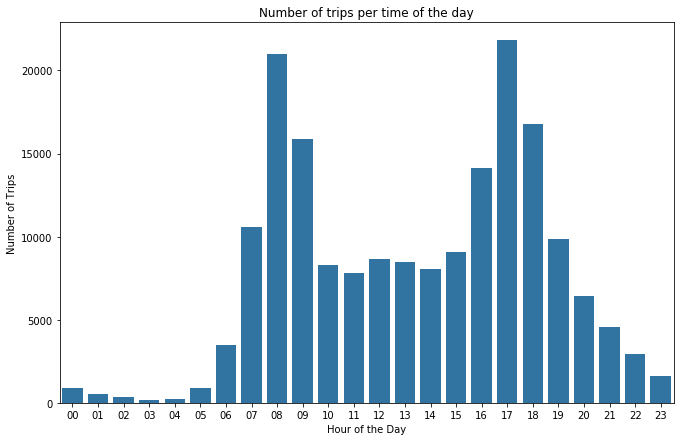

In [5]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[11, 7])
sb.countplot(data=df_6000, x="hour", color=base_color)
plt.title("Number of trips per time of the day")
plt.ylabel('Number of Trips')
plt.xlabel('Hour of the Day');

## Not only young customers

> The majority of customers is between 25 and 35 years old, but there are even some who are 80 years old.

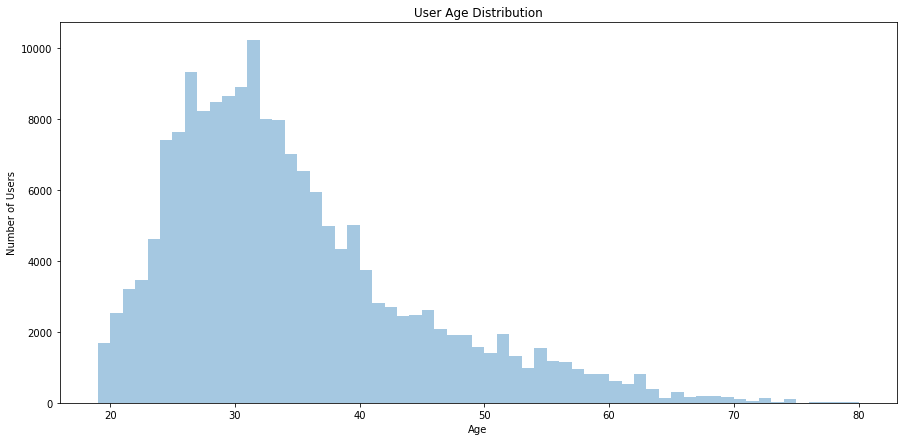

In [6]:
binsize = 1
bins = np.arange(19, df_6000['age'].max()+binsize, binsize)

plt.figure(figsize=[15, 7])
sb.distplot(df_6000['age'], bins, kde=False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users');

## Trip duration depends on day of the week and user data

> Customers which are not subscribed have a median trip duration about 1.5 times longer compared to subscribers. Males have a shorter median trip duration compared to females and other genders.
During the weekend the time increases overall, even tho there are less trips.

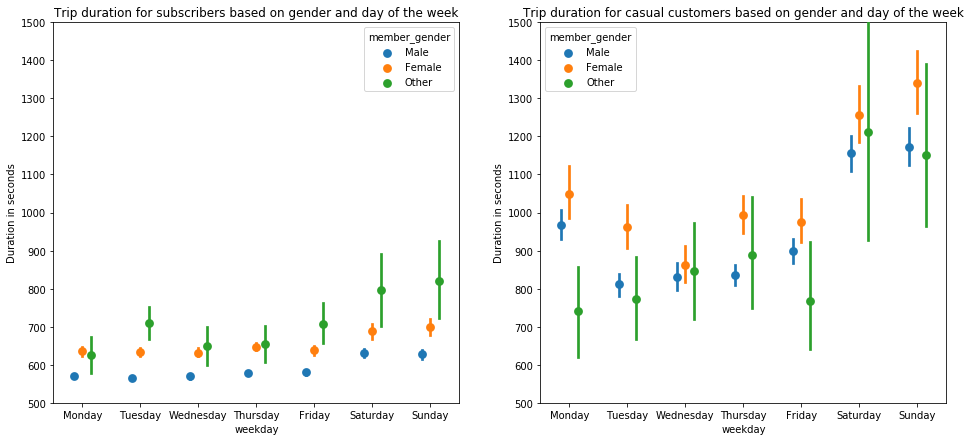

In [7]:
_, axis = plt.subplots(1, 2, figsize=[16, 7])
subscribers_df = df_6000.query("user_type=='Subscriber'")
customers_df = df_6000.query("user_type=='Customer'")

# subscribers
sb.pointplot(data=subscribers_df, x="weekday", y="duration_sec", 
             hue="member_gender", linestyles="", dodge=0.3, ax=axis[0])
axis[0].set_title("Trip duration for subscribers based on gender and day of the week")
axis[0].set_ylabel("Duration in seconds")
axis[0].set_ylim([500, 1500])
axis[0].set_yticks(list(range(500, 1501, 100)))

# casual customers
sb.pointplot(data=customers_df, x="weekday", y="duration_sec", 
             hue="member_gender", linestyles="", dodge=0.3, ax=axis[1])
axis[1].set_title("Trip duration for casual customers based on gender and day of the week")
axis[1].set_ylabel("Duration in seconds")
axis[1].set_ylim([500, 1500])
axis[1].set_yticks(list(range(500, 1501, 100)));

> From the terminal or command line, use the following expression to export the notebook and set up a server for the slides:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`